<img src= "https://www.onthemarket.com/content/wp-content/uploads/2018/01/Housepricepredictions2018lead.jpg"
     style='width: 50%; display: block; margin-left: auto; margin-right: auto'>

 # HOUSE PRICE PREDICTION

<div style="color:white;
           display:fill;
           background-color:#b0c4de;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
           flex-direction: row;">

<h1 style="padding: 2rem;
          color:white;
          text-align:center;
          margin:0 auto;
          font-size:3rem;">
   TABLE OF CONTENTS:
</h1>
 
</div>
<div style="
           display:fill;
           background-color:#b0c4de;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
           flex-direction: row;
           justify-content: center"
     >
<ul style="
           background-color:#b0c4de;
           margin-left: 2rem;
               ">

<li style="color: white;
           font-size:1.75rem;">
<text >
 SETTINGS AND DATA LOADING
</text>
    <ul>
      <li>Import libraries</li>
    </ul>
</li>
<li style="color: white;
           font-size:1.75rem;">

<text >
 EXPLORATORY DATA ANALYSIS
</text>
    <ul>
      <li>Missing values visualization</li>
    </ul>
    <ul>
      <li>Filling missing values</li>
    </ul>
    <ul>
      <li>Preprocessing</li>
    </ul>

</li>

 <li style="color: white;
           font-size:1.75rem;">
<text >
  ML - XGBoost
</text>
    <ul>
        <li>
             Feature selection
        </li>
    </ul>
</li> 
    
</ul>
</div>

<div id = 3 style="color:white;    
           display:fill;
           border-radius:5px;
           background-color:#b0c4de;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 2rem;
              color:white;
          text-align:center;
          margin:0 auto;
          ">
    SETTINGS AND DATA LOADING
</h2>
</div>

# IMPORT LIBRARIES

In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox
from scipy.special import inv_boxcox

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import lightgbm as lgb
import xgboost as xgb

In [2]:
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
print(colored(f"Training data","blue"),"-> ROWS:",train_data.shape[0],"COLUMNS:",train_data.shape[1])
print(colored(f"Test data","red"),"-> ROWS:",test_data.shape[0],"COLUMNS:",test_data.shape[1])

Training data -> ROWS: 1460 COLUMNS: 81
Test data -> ROWS: 1459 COLUMNS: 80


Let's inspect the dataset:

**TRAINING DATA**

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**TESTING DATA**

In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


<div id = 3 style="color:white;    
           display:fill;
           border-radius:5px;
           background-color:#b0c4de;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 2rem;
              color:white;
          text-align:center;
          margin:0 auto;
          ">
    EXPLORATORY DATA ANALYSIS
</h2>
</div>

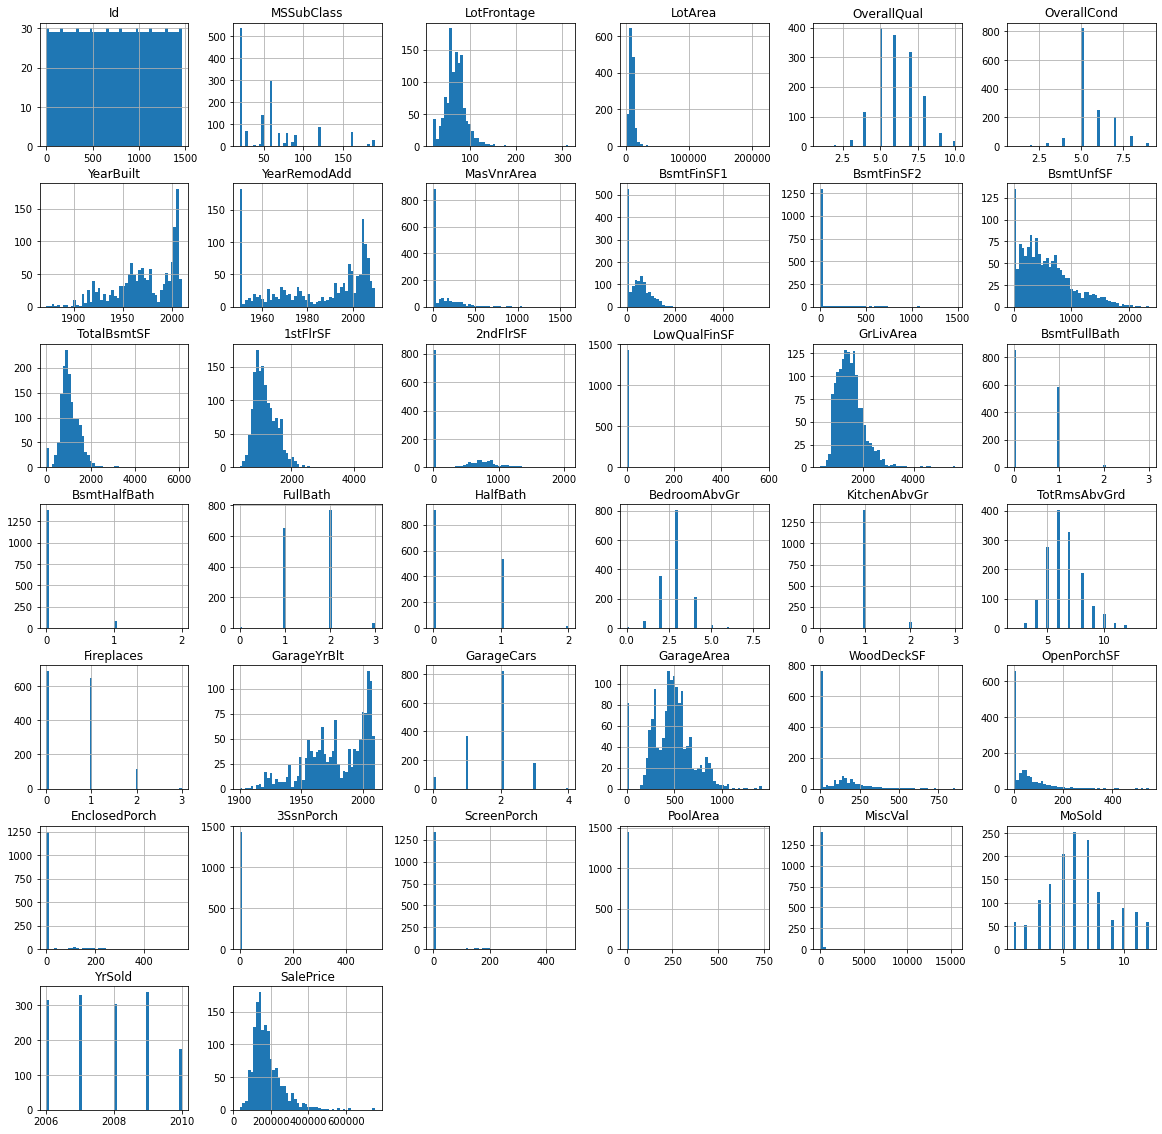

In [9]:
%matplotlib inline
train_data.hist(bins=50, figsize=(20,20))
plt.show()

**Variables associated with SalePrice**

In [10]:
corr = train_data.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


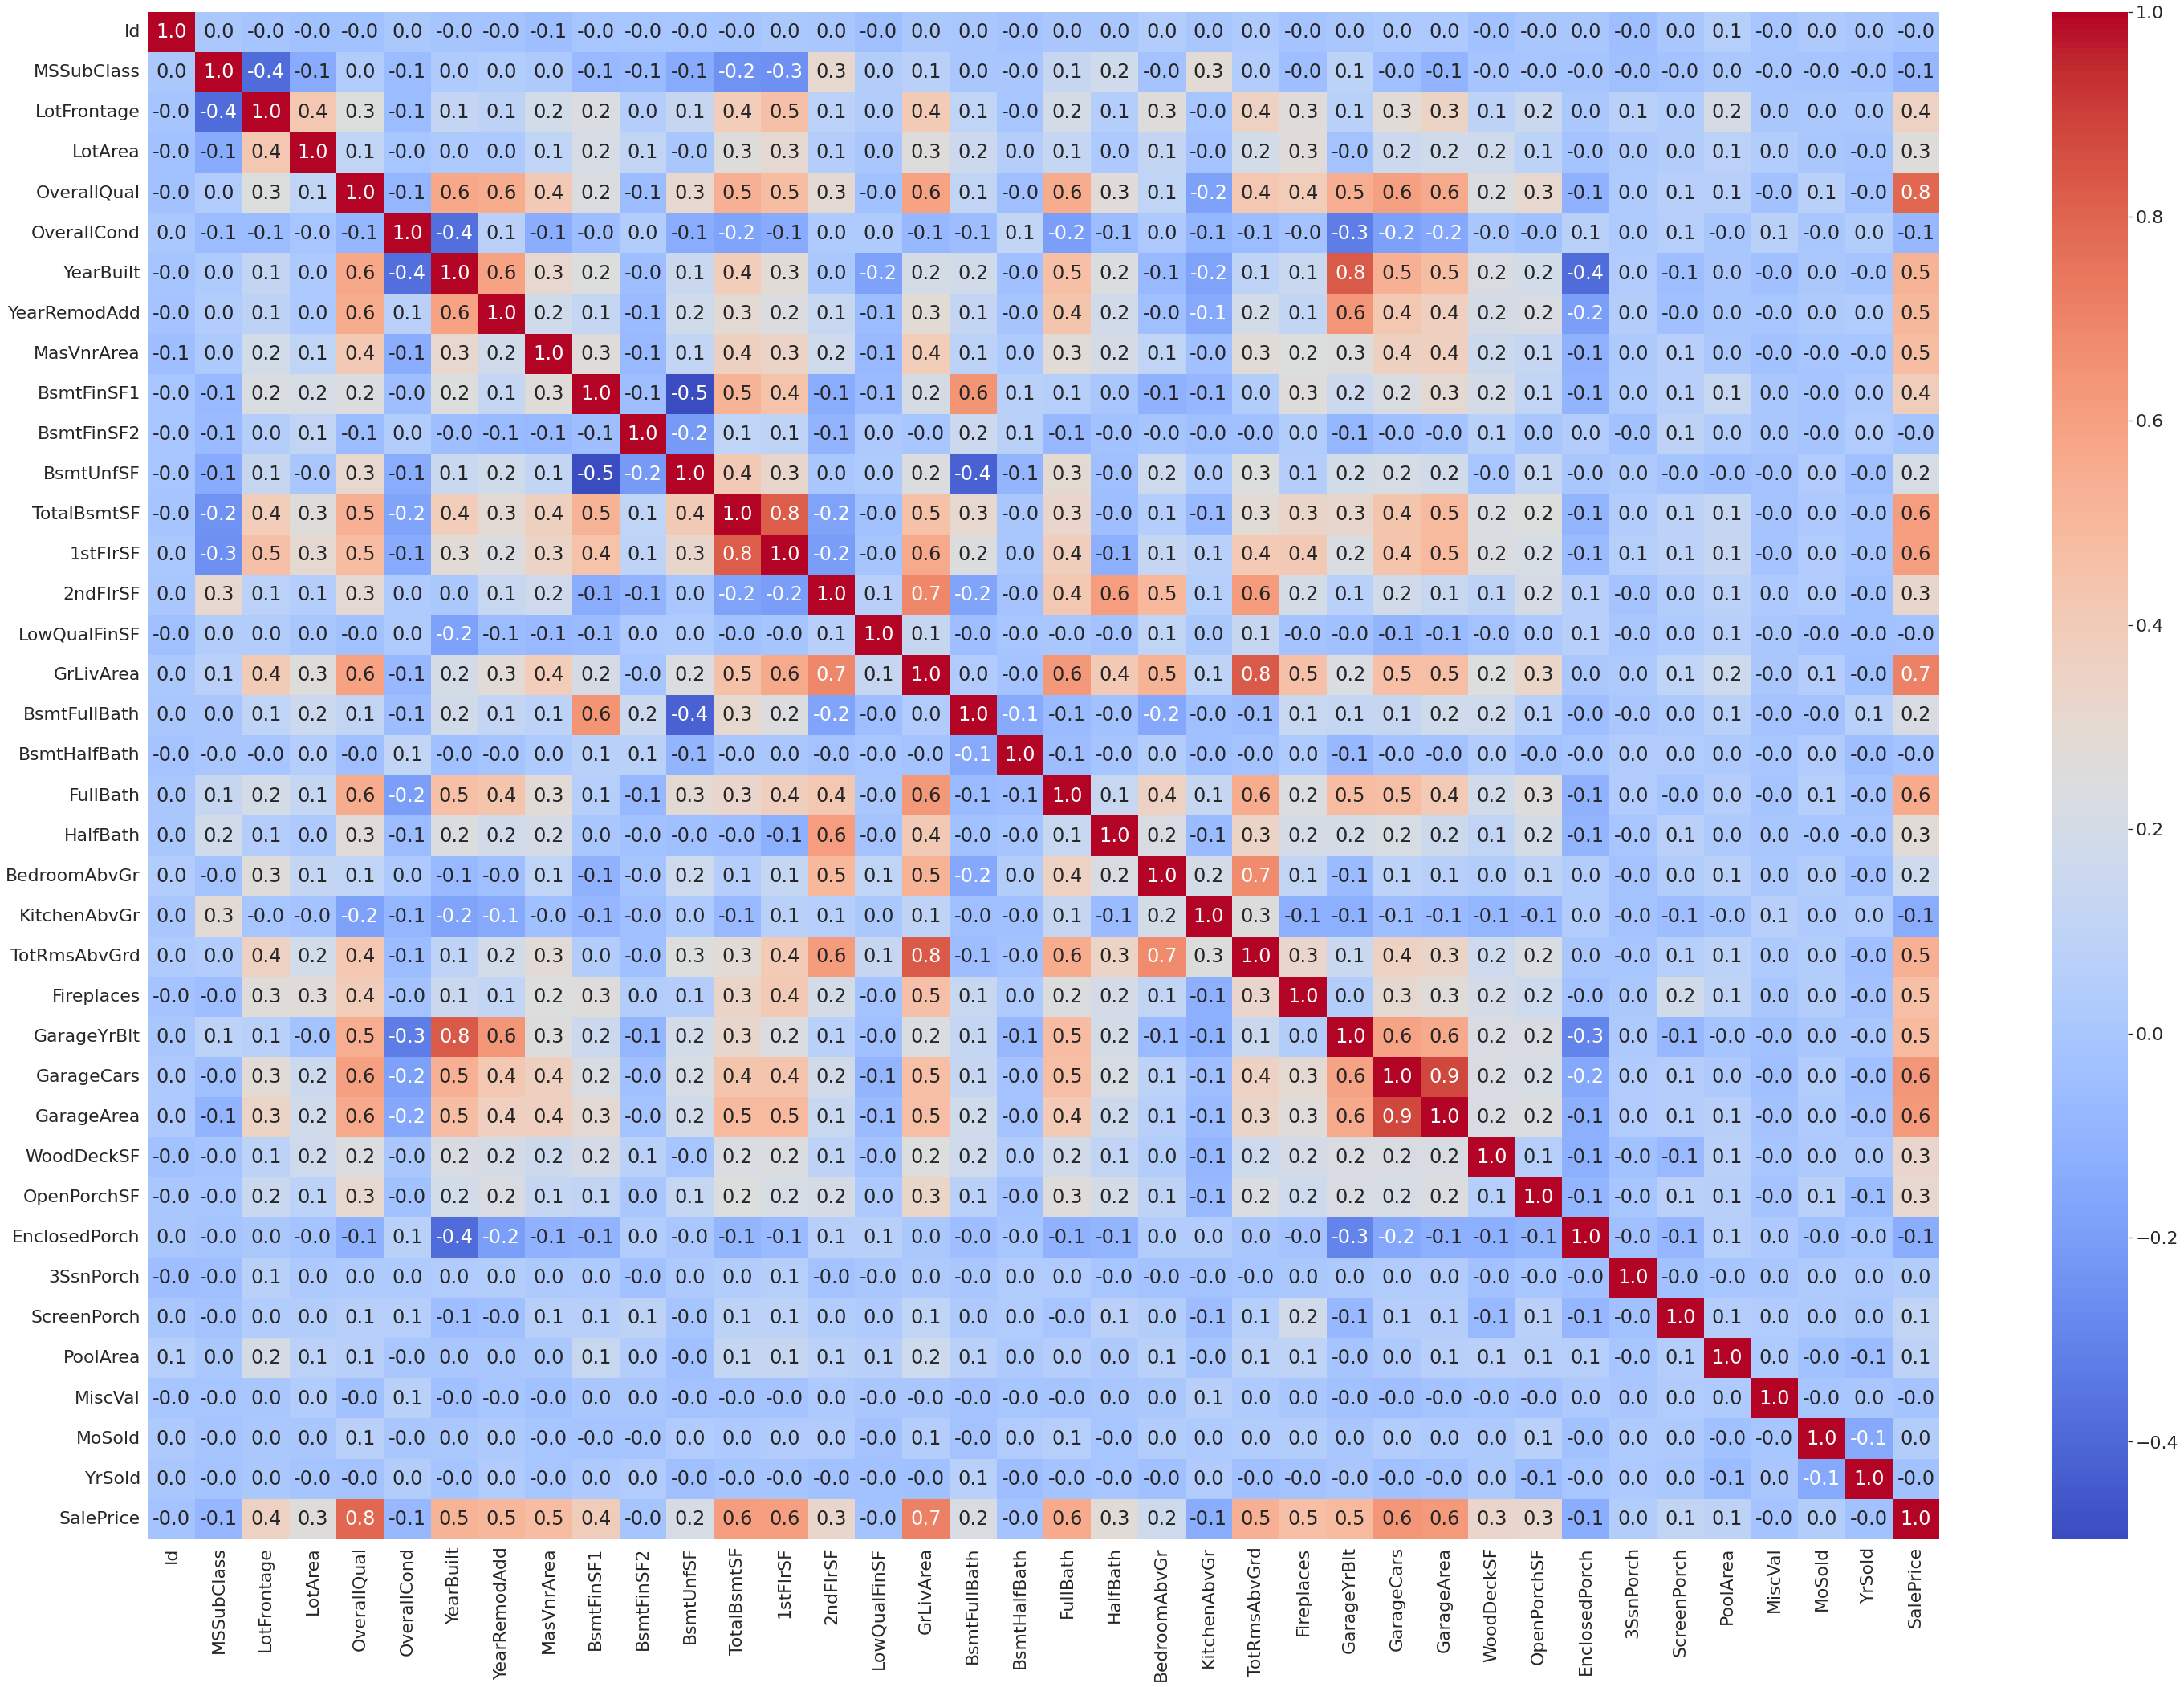

In [11]:
sns.set(font_scale=2)
plt.figure(figsize=(50,35))
ax = sns.heatmap(corr,annot=True,fmt='.1f',cmap='coolwarm')

In [12]:
corr_dict = corr["SalePrice"].sort_values(ascending=False).to_dict()
corr_dict

{'SalePrice': 1.0,
 'OverallQual': 0.7909816005838053,
 'GrLivArea': 0.7086244776126515,
 'GarageCars': 0.6404091972583519,
 'GarageArea': 0.6234314389183622,
 'TotalBsmtSF': 0.6135805515591943,
 '1stFlrSF': 0.6058521846919153,
 'FullBath': 0.5606637627484453,
 'TotRmsAbvGrd': 0.5337231555820284,
 'YearBuilt': 0.5228973328794967,
 'YearRemodAdd': 0.5071009671113866,
 'GarageYrBlt': 0.4863616774878596,
 'MasVnrArea': 0.47749304709571444,
 'Fireplaces': 0.46692883675152763,
 'BsmtFinSF1': 0.3864198062421535,
 'LotFrontage': 0.35179909657067737,
 'WoodDeckSF': 0.32441344456812926,
 '2ndFlrSF': 0.31933380283206736,
 'OpenPorchSF': 0.31585622711605504,
 'HalfBath': 0.28410767559478256,
 'LotArea': 0.2638433538714051,
 'BsmtFullBath': 0.22712223313149427,
 'BsmtUnfSF': 0.21447910554696928,
 'BedroomAbvGr': 0.16821315430073963,
 'ScreenPorch': 0.11144657114291112,
 'PoolArea': 0.09240354949187318,
 'MoSold': 0.046432245223819446,
 '3SsnPorch': 0.04458366533574838,
 'BsmtFinSF2': -0.0113781214

In [13]:
#print the most positively correlated features
pos_corr = {k:v for k,v in corr_dict.items() if v > 0.1 and v != 1} 
pos_corr

{'OverallQual': 0.7909816005838053,
 'GrLivArea': 0.7086244776126515,
 'GarageCars': 0.6404091972583519,
 'GarageArea': 0.6234314389183622,
 'TotalBsmtSF': 0.6135805515591943,
 '1stFlrSF': 0.6058521846919153,
 'FullBath': 0.5606637627484453,
 'TotRmsAbvGrd': 0.5337231555820284,
 'YearBuilt': 0.5228973328794967,
 'YearRemodAdd': 0.5071009671113866,
 'GarageYrBlt': 0.4863616774878596,
 'MasVnrArea': 0.47749304709571444,
 'Fireplaces': 0.46692883675152763,
 'BsmtFinSF1': 0.3864198062421535,
 'LotFrontage': 0.35179909657067737,
 'WoodDeckSF': 0.32441344456812926,
 '2ndFlrSF': 0.31933380283206736,
 'OpenPorchSF': 0.31585622711605504,
 'HalfBath': 0.28410767559478256,
 'LotArea': 0.2638433538714051,
 'BsmtFullBath': 0.22712223313149427,
 'BsmtUnfSF': 0.21447910554696928,
 'BedroomAbvGr': 0.16821315430073963,
 'ScreenPorch': 0.11144657114291112}

In [14]:
#print the most negatively correlated features
neg_corr = {k:v for k,v in corr_dict.items() if v < -0.1}
neg_corr

{'EnclosedPorch': -0.1285779579259566, 'KitchenAbvGr': -0.13590737084214105}

Let's see the trend of two of the positively correlated features...

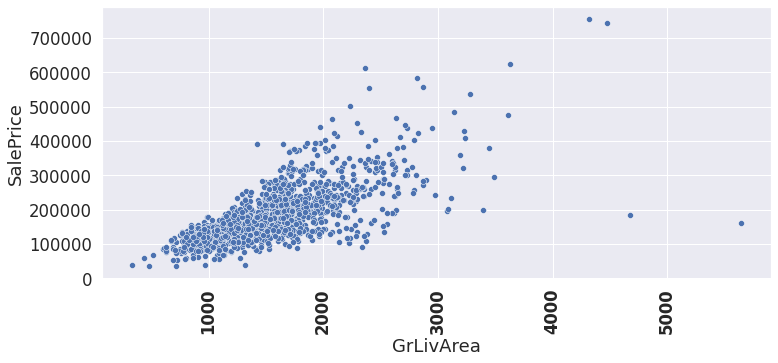

In [15]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.5)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.xticks(weight='bold',rotation=90)
plt.show()

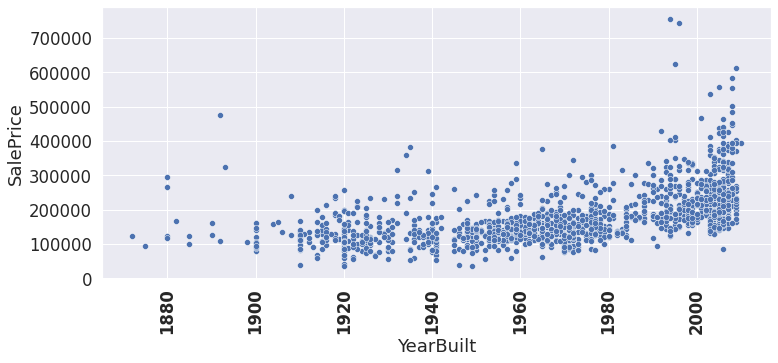

In [16]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.5)
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_data)
plt.xticks(weight='bold',rotation=90)
plt.show()

In [17]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [18]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


Let's combine **training set** and **testing set** to have a single set to work on and make the most of the information available.

In [19]:
train_test = pd.concat([train_data,test_data],axis=0,sort=False)
print(train_test.shape)

(2919, 81)


# MISSING VALUES VISUALIZATION

In [20]:
# function for detecting the presence in percentage of NaN values
def percentageOfnull(df):
    nan_count = df.isna().sum().sort_values(ascending=False)
    nan_percentage = ((df.isna().sum()/df.isna().count())*100).sort_values(ascending=False)
    df_dtype = df.dtypes
    df_info = pd.concat([nan_count,nan_percentage,df_dtype],axis=1,keys=['Null Count','Null Percentage','DataTypes'])
    return df_info[df_info['Null Count']>0]

In [21]:
percentageOfnull(train_test)

,Null Count,Null Percentage,DataTypes
PoolQC,2909,99.657417,object
MiscFeature,2814,96.402878,object
Alley,2721,93.216855,object
Fence,2348,80.438506,object
SalePrice,1459,49.982871,float64
FireplaceQu,1420,48.646797,object
LotFrontage,486,16.649538,float64
GarageFinish,159,5.447071,object
GarageQual,159,5.447071,object
GarageCond,159,5.447071,object


# FILLING MISSING VALUES

In [22]:
num_feats = list(train_test.drop('SalePrice',axis=1).select_dtypes(include='number'))
categ_feats = list(train_test.select_dtypes(exclude='number'))
print(num_feats,end="\n\n")
print(categ_feats,end="\n\n")

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'Ga

In [23]:
train_test[num_feats].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,836.0,192,84,0,0,0,0,0,12,2008


In [24]:
train_test[categ_feats].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Looking at the file **data_description.txt**, the presence of NaN values in the categorical features seems to be due in most cases to a real lack of a feature in that house, and not to a defect in the dataset. For example, 'PoolQC' has a null rate of 99.6% because 99.6% of homes do not have a pool.
Therefore, let's replace NaN with 'None'.

In [25]:
train_test[categ_feats] = train_test[categ_feats].replace(np.nan,'None')
train_test[categ_feats].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [26]:
percentageOfnull(train_test[categ_feats])

,Null Count,Null Percentage,DataTypes


At this point we no longer have NaN values in the categorical features but we have to manage the numerical ones.

In [27]:
num_feats_withNaN = list(percentageOfnull(train_test[num_feats]).index.values)
percentageOfnull(train_test[num_feats])

,Null Count,Null Percentage,DataTypes
LotFrontage,486,16.649538,float64
GarageYrBlt,159,5.447071,float64
MasVnrArea,23,0.787941,float64
BsmtHalfBath,2,0.068517,float64
BsmtFullBath,2,0.068517,float64
BsmtFinSF2,1,0.034258,float64
GarageCars,1,0.034258,float64
GarageArea,1,0.034258,float64
TotalBsmtSF,1,0.034258,float64
BsmtUnfSF,1,0.034258,float64


Text(0.5, 1.0, 'TRAINING SET - missing values distribution')

<Figure size 720x720 with 0 Axes>

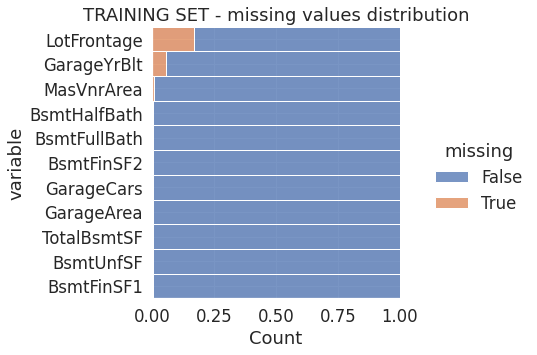

In [28]:
plt.figure(figsize=(10,10))
sns.displot(
    data=train_test[num_feats_withNaN].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title("TRAINING SET - missing values distribution")

Let's examine one by one the numerical characteristics that have NaN values...

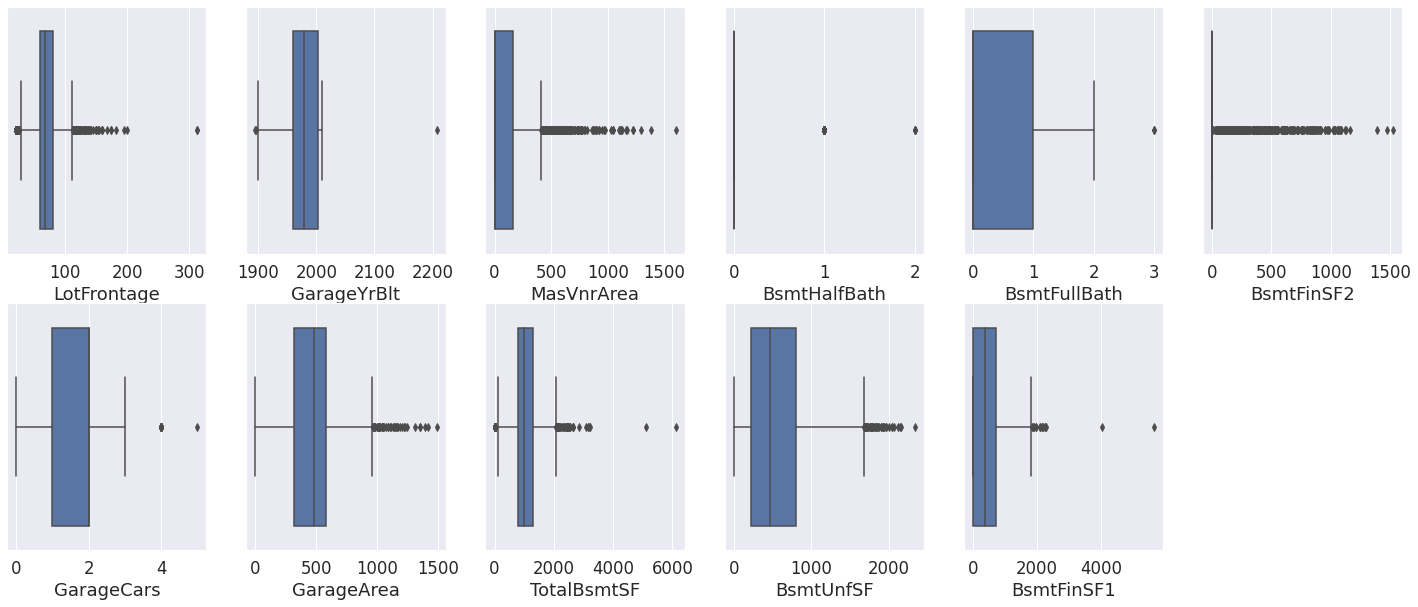

In [29]:
rows = 2
cols = math.ceil(len(num_feats_withNaN)/2)
fig = plt.figure(figsize= (25,10))
for i, col in enumerate(num_feats_withNaN):
    ax=fig.add_subplot( rows, cols, i+1)
    sns.boxplot(train_test[col],ax=ax)

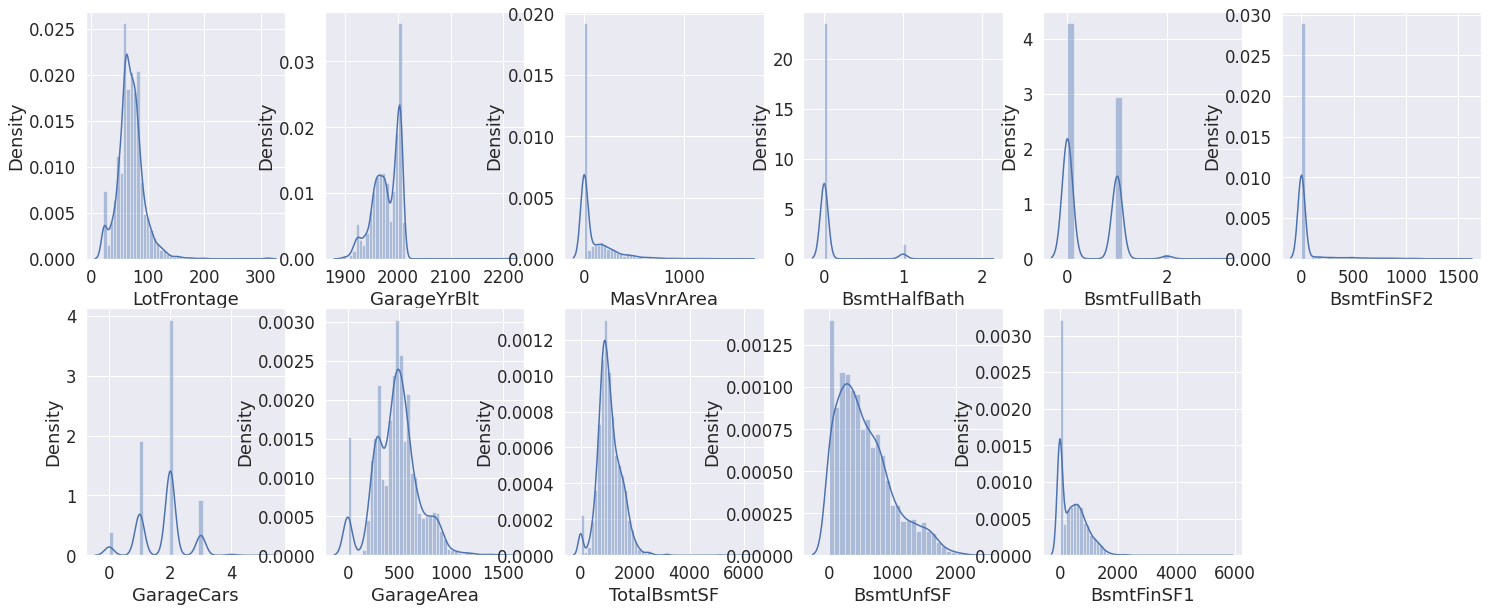

In [30]:
rows = 2
cols = math.ceil(len(num_feats_withNaN)/2)
fig = plt.figure(figsize= (25,10))
for i, col in enumerate(num_feats_withNaN):
    ax=fig.add_subplot( rows, cols, i+1)
    sns.distplot(train_test[col],ax=ax)

Since all the features examined have outliers and none of them have a normal distribution, we should replace the NaN values with the median.

In [31]:
print(colored(f"NUMERICAL FEATURES --> MEDIAN:","blue"))
print("LotFrontage:",train_test['LotFrontage'].median())
print("GarageYrBlt:",train_test['GarageYrBlt'].median())
print("MasVnrArea:",train_test['MasVnrArea'].median())
print("BsmtHalfBath:",train_test['BsmtHalfBath'].median())
print("BsmtFullBath:",train_test['BsmtFullBath'].median())
print("BsmtFinSF2:",train_test['BsmtFinSF2'].median())
print("GarageCars:",train_test['GarageCars'].median())
print("GarageArea:",train_test['GarageArea'].median())
print("TotalBsmtSF:",train_test['TotalBsmtSF'].median())
print("BsmtUnfSF:",train_test['BsmtUnfSF'].median())
print("BsmtFinSF1:",train_test['BsmtFinSF1'].median())

NUMERICAL FEATURES --> MEDIAN:
LotFrontage: 68.0
GarageYrBlt: 1979.0
MasVnrArea: 0.0
BsmtHalfBath: 0.0
BsmtFullBath: 0.0
BsmtFinSF2: 0.0
GarageCars: 2.0
GarageArea: 480.0
TotalBsmtSF: 989.5
BsmtUnfSF: 467.0
BsmtFinSF1: 368.5


In [32]:
#replace missing values in each numerical feature with the median
for feat in num_feats:
    train_test[feat].fillna(train_test[feat].median(), inplace=True)

In [33]:
percentageOfnull(train_test)

,Null Count,Null Percentage,DataTypes
SalePrice,1459,49.982871,float64


In [34]:
#print categories of each categorical column
for col in train_test.select_dtypes(exclude=['number']):
  print(f'{col:-<30},{train_test[col].unique()}')

MSZoning----------------------,['RL' 'RM' 'C (all)' 'FV' 'RH' 'None']
Street------------------------,['Pave' 'Grvl']
Alley-------------------------,['None' 'Grvl' 'Pave']
LotShape----------------------,['Reg' 'IR1' 'IR2' 'IR3']
LandContour-------------------,['Lvl' 'Bnk' 'Low' 'HLS']
Utilities---------------------,['AllPub' 'NoSeWa' 'None']
LotConfig---------------------,['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope---------------------,['Gtl' 'Mod' 'Sev']
Neighborhood------------------,['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1--------------------,['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2--------------------,['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType----------------------,['1Fam' '2fmCon' 'Duplex' 'TwnhsE'

In [35]:
train_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


# PREPROCESSING

In [36]:
train_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [37]:
Id_test = train_test[1460:2919]["Id"]
train_test.drop("Id",axis=1,inplace=True)

In [38]:
train_test.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0
5,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,307000.0
7,60,RL,68.0,10382,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,Shed,350,11,2009,WD,Normal,200000.0
8,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2008,WD,Abnorml,129900.0
9,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,None,None,0,1,2008,WD,Normal,118000.0


In [39]:
num_feats = [item for item in num_feats if item != 'Id']
num_feats

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [40]:
LABELS = test_data.drop('Id',axis=1).columns
encoder = LabelEncoder()
for col in LABELS:
    # Check if object
    if train_test[col].dtype == 'O':
        train_test[col] = encoder.fit_transform(train_test[col])
        
    elif train_test[col].dtype == 'bool':
        train_test[col] = train_test[col].astype('int')

ss_scaler = StandardScaler()

# Apply Standard Scaling
train_test[num_feats] = ss_scaler.fit_transform(train_test[num_feats])

In [41]:
train_test.tail(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1439,0.537805,4,3.326959,0.115639,1,1,3,3,0,0,...,-0.06315,3,4,1,-0.089592,-0.446925,-1.363569,9,4,NaN
1440,-0.873616,4,-0.051064,5.064124,1,1,0,2,0,4,...,-0.06315,3,4,1,-0.089592,-1.183764,-1.363569,9,2,NaN
1441,-0.873616,4,-0.051064,-0.262517,1,1,0,3,0,4,...,-0.06315,3,4,1,-0.089592,1.395173,-1.363569,9,4,NaN
1442,-0.873616,4,1.215695,0.437489,1,1,3,3,0,0,...,-0.06315,3,4,1,-0.089592,1.763592,-1.363569,6,5,NaN
1443,-0.873616,4,0.887276,0.178665,1,1,3,3,0,4,...,-0.06315,3,4,1,-0.089592,1.026753,-1.363569,6,5,NaN
1444,-0.873616,2,2.623204,2.673451,1,1,3,3,0,4,...,-0.06315,3,4,1,-0.089592,-0.446925,-1.363569,9,4,NaN
1445,0.773042,5,0.418106,-0.399221,1,1,3,3,0,4,...,-0.06315,3,4,1,-0.089592,1.763592,-1.363569,9,4,NaN
1446,2.419700,5,-1.317822,-0.951490,1,1,3,3,0,4,...,-0.06315,3,4,1,-0.089592,-0.446925,-1.363569,9,4,NaN
1447,-0.873616,4,-0.520234,0.000493,1,1,0,3,0,4,...,-0.06315,3,4,1,-0.089592,1.395173,-1.363569,9,4,NaN
1448,0.773042,4,-0.051064,0.211509,1,1,0,3,0,0,...,-0.06315,3,4,1,-0.089592,-1.183764,-1.363569,9,4,NaN


In [42]:
train_data = train_test[0:1460]
test_data = train_test[1460:2919]

<AxesSubplot:>

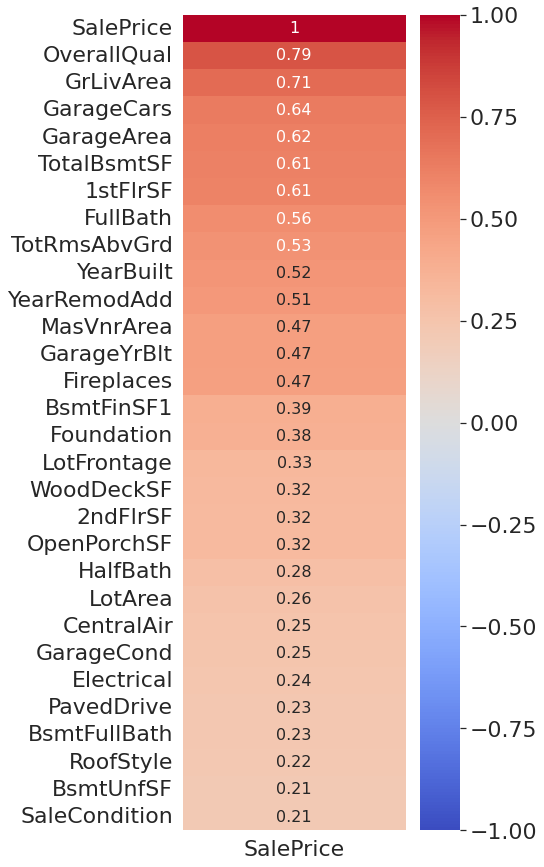

In [43]:
corr_new_train = train_data.corr()
sns.set(font_scale=2)
plt.figure(figsize=(5,15))
sns.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),annot_kws={"size": 16},vmin=-1, cmap='coolwarm', annot=True)

<div id = 3 style="color:white;    
           display:fill;
           border-radius:5px;
           background-color:#b0c4de;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 2rem;
              color:white;
          text-align:center;
          margin:0 auto;
          ">
    ML - XGBoost
</h2>
</div>

In [44]:
train_data['SalePrice'] = train_data['SalePrice'].astype('int')

In [45]:
X=train_data.drop(["SalePrice"],axis=1)
y=train_data["SalePrice"]
print(X.shape)
print(y.shape)

(1460, 79)
(1460,)


In [46]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.067331,4,-0.191815,-0.217879,1,1,3,3,0,4,...,-0.285935,-0.06315,3,4,1,-0.089592,-1.552184,0.157646,9,4
1,-0.873616,4,0.511940,-0.072044,1,1,3,3,0,2,...,-0.285935,-0.06315,3,4,1,-0.089592,-0.446925,-0.602962,9,4
2,0.067331,4,-0.051064,0.137197,1,1,0,3,0,4,...,-0.285935,-0.06315,3,4,1,-0.089592,1.026753,0.157646,9,4
3,0.302568,4,-0.426400,-0.078385,1,1,0,3,0,0,...,-0.285935,-0.06315,3,4,1,-0.089592,-1.552184,-1.363569,9,0
4,0.067331,4,0.699608,0.518903,1,1,0,3,0,2,...,-0.285935,-0.06315,3,4,1,-0.089592,2.132012,0.157646,9,4


# FEATURE SELECTION

Given the high number of features, it may be a good idea to make a feature selection to extract the most significant ones and discard those that might invalidate the prediction instead.
To do this, I thought of using **LASSO** and, through a **Leave-One-Out** cross validation, we extract the most significant features. We assume that 'significant' are the features that appear at least 50% of the time LASSO is performed.

In [47]:
feats_rank = {}
# LEAVE-ONE-OUT
n_subjs = X.shape[0]
for i in range(n_subjs):
    Xi = X.drop(X.index[i])
    yi = y.drop(y.index[i])

    lasso = Lasso(alpha=0.01,selection='random').fit(Xi, yi)
    feats_selected = np.where(lasso.coef_>0)[0]
    for f in feats_selected:
        feats_rank[f] = feats_rank.get(f,0) + 1

In [48]:
best_feats = {}
best_feats = {k:v for k,v in zip(feats_rank.keys(),feats_rank.values()) if v > (n_subjs/2)} #best features appear at least once in two 
print("The",len(best_feats)," best features found are: ",best_feats)

The 42  best features found are:  {3: 1460, 4: 1460, 5: 1460, 7: 1460, 9: 1456, 10: 1460, 11: 1460, 16: 1460, 17: 1460, 18: 1460, 20: 1460, 21: 1460, 23: 1460, 24: 1460, 25: 1460, 27: 1460, 28: 1460, 30: 1460, 33: 1105, 34: 1459, 35: 1139, 37: 961, 45: 1353, 46: 1460, 47: 1398, 48: 1460, 49: 1455, 53: 1460, 54: 1460, 55: 1460, 57: 1460, 60: 1460, 63: 1443, 64: 1460, 65: 1460, 68: 1460, 69: 1460, 72: 1445, 74: 1448, 78: 1460, 42: 1308, 43: 1255}


In [49]:
X = X.iloc[:,list(best_feats.keys())]
print(X.shape)

(1460, 42)


In [50]:
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.25,random_state=1)
Xtr.dtypes

LotArea          float64
Street             int64
Alley              int64
LandContour        int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
OverallQual      float64
OverallCond      float64
YearBuilt        float64
RoofStyle          int64
RoofMatl           int64
Exterior2nd        int64
MasVnrType         int64
MasVnrArea       float64
ExterCond          int64
Foundation         int64
BsmtCond           int64
BsmtFinSF1       float64
BsmtFinType2       int64
BsmtFinSF2       float64
TotalBsmtSF      float64
GrLivArea        float64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath         float64
HalfBath         float64
TotRmsAbvGrd     float64
Functional         int64
Fireplaces       float64
GarageType         int64
GarageCars       float64
GarageCond         int64
PavedDrive         int64
WoodDeckSF       float64
3SsnPorch        float64
ScreenPorch      float64
Fence              int64
MiscVal          float64
SaleCondition      int64


In [51]:
ytr.dtypes

dtype('int64')

**XGB**

In [52]:
params = { 'max_depth': [6,10,50], #Maximum tree depth for base learners
           'learning_rate': [0.01, 0.02, 0.05], #Boosting learning rate
           'n_estimators': [100, 500, 1000], #Number of gradient boosted trees. Equivalent to number of boosting rounds
           'colsample_bytree': [0.7, 1.0]} #Subsample ratio of columns when constructing each tree

xgb_reg = xgb.XGBRegressor(seed=20)

xgb_grid = GridSearchCV(estimator=xgb_reg, param_grid=params, cv=2)

xgb_grid.fit(Xtr,ytr)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat..._step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                       

In [53]:
pred = xgb_grid.predict(Xte)
R2 = r2_score(yte,pred)
MSE = mean_squared_error(yte,pred)
RMSE = math.sqrt(MSE)
print('-'*10+'XGB'+'-'*10)
print('R square Accuracy: ',R2)
print('Mean Squared Error Accuracy: ',MSE)
print('Root Mean Squared Error: ',RMSE)

----------XGB----------
R square Accuracy:  0.9223593698832311
Mean Squared Error Accuracy:  521219255.01323473
Root Mean Squared Error:  22830.22678409557


In [54]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-0.873616,3,0.511940,0.184371,1,1,3,3,0,4,...,-0.06315,3,2,1,-0.089592,-0.078505,1.67886,9,4,NaN
1,-0.873616,4,0.558857,0.519791,1,1,0,3,0,0,...,-0.06315,3,4,0,21.944410,-0.078505,1.67886,9,4,NaN
2,0.067331,4,0.230438,0.464374,1,1,0,3,0,4,...,-0.06315,3,2,1,-0.089592,-1.183764,1.67886,9,4,NaN
3,0.067331,4,0.418106,-0.024109,1,1,0,3,0,4,...,-0.06315,3,4,1,-0.089592,-0.078505,1.67886,9,4,NaN
4,1.478753,4,-1.223988,-0.654748,1,1,0,1,0,4,...,-0.06315,3,4,1,-0.089592,-1.920603,1.67886,9,4,NaN


In [55]:
test_data = test_data.iloc[:,list(best_feats.keys())]

**PREDICTION**

In [56]:
output = pd.DataFrame(columns=["Id","SalePrice"])
output["Id"] = Id_test
output["SalePrice"] = xgb_grid.predict(test_data)
output["Id"] = output["Id"].astype(int)
output.head()

,Id,SalePrice
0,1461,126844.875000
1,1462,162889.015625
2,1463,180612.234375
3,1464,190796.906250
4,1465,191223.296875


In [57]:
output.to_csv('submission.csv',index=False)

# Thank you for your attention and please let me know what you think. Any doubts or suggestions are welcome! 🙂🏠